In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 200

In [2]:
!pip install tensorflow
import tensorflow
from tensorflow.keras.models import Sequential
from keras.layers import Dense

# Problem Statement 
Predict the burnt area of forest fires with neural network

In [3]:
df=pd.read_csv(r"E:\Data Science\Assignments\Neural Networks\forestfires.csv")
df.head(10)

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
5,aug,sun,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,...,0,0,0,0,0,0,0,0,0,small
6,aug,mon,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,...,0,0,0,0,0,0,0,0,0,small
7,aug,mon,91.5,145.4,608.2,10.7,8.0,86,2.2,0.0,...,0,0,0,0,0,0,0,0,0,small
8,sep,tue,91.0,129.5,692.6,7.0,13.1,63,5.4,0.0,...,0,0,0,0,0,0,0,0,1,small
9,sep,sat,92.5,88.0,698.6,7.1,22.8,40,4.0,0.0,...,0,0,0,0,0,0,0,0,1,small


In [4]:
df.shape

(517, 31)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [6]:
df[df.duplicated()]

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
53,aug,wed,92.1,111.2,654.1,9.6,20.4,42,4.9,0.0,...,0,0,0,0,0,0,0,0,0,small
100,aug,sun,91.4,142.4,601.4,10.6,19.8,39,5.4,0.0,...,0,0,0,0,0,0,0,0,0,small
215,mar,sat,91.7,35.8,80.8,7.8,17.0,27,4.9,0.0,...,0,0,0,0,1,0,0,0,0,large
303,jun,fri,91.1,94.1,232.1,7.1,19.2,38,4.5,0.0,...,0,0,0,1,0,0,0,0,0,small
426,aug,thu,91.6,248.4,753.8,6.3,20.4,56,2.2,0.0,...,0,0,0,0,0,0,0,0,0,small
461,aug,sat,93.7,231.1,715.1,8.4,18.9,64,4.9,0.0,...,0,0,0,0,0,0,0,0,0,small
501,aug,tue,96.1,181.1,671.2,14.3,21.6,65,4.9,0.8,...,0,0,0,0,0,0,0,0,0,small
508,aug,fri,91.0,166.9,752.6,7.1,25.9,41,3.6,0.0,...,0,0,0,0,0,0,0,0,0,small


In [7]:
df= df.drop_duplicates()

In [8]:
# Dropping One Hot Encoded columns
df=df.drop(df.columns[11:30],axis=1)

In [9]:
df

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,small
...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,small


###  Label encoding

In [10]:
label=LabelEncoder()

In [11]:
df["month"]=label.fit_transform(df["month"])
df["day"]=label.fit_transform(df["day"])
df["size_category"]=label.fit_transform(df["size_category"])

In [12]:
df

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,7,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1
1,10,5,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,1
2,10,2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,1
3,7,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1
4,7,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...
512,1,3,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0
513,1,3,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0
514,1,3,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0
515,1,2,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,1


In [13]:
# Checking Distribution of Data

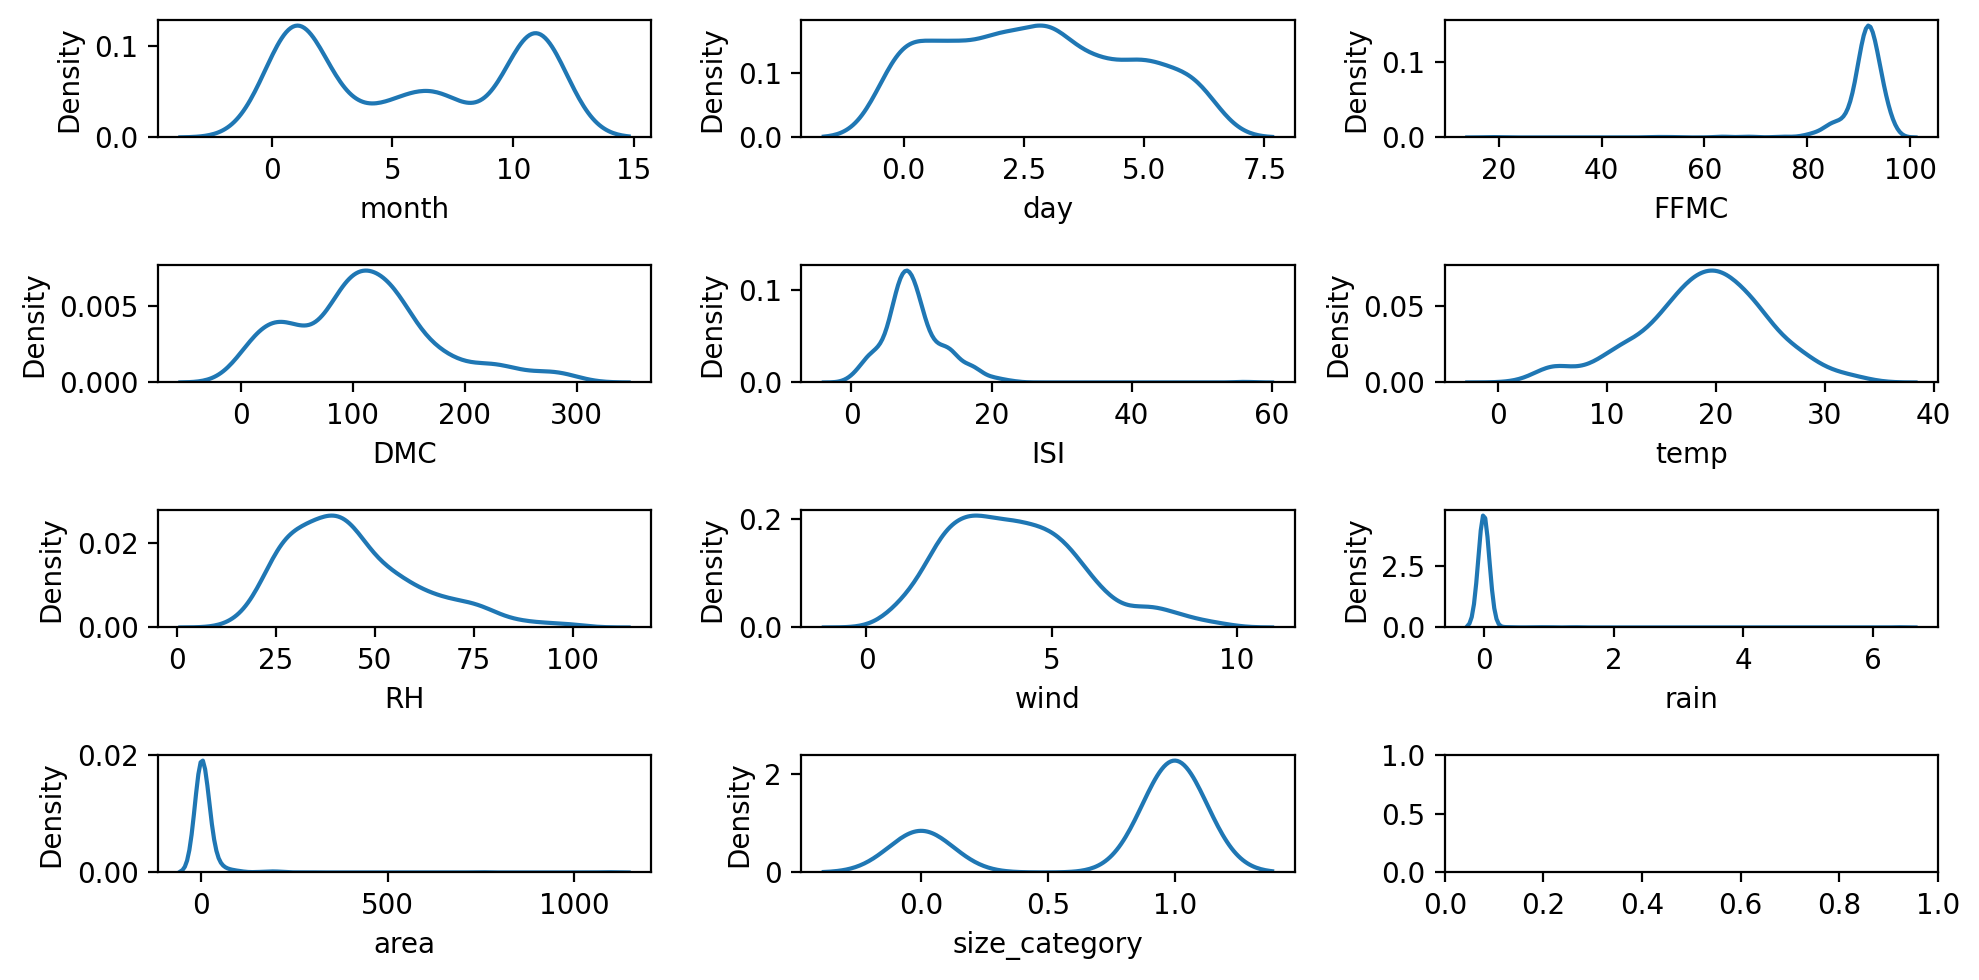

In [14]:
fig,ax=plt.subplots(4, 3)

sns.kdeplot(df.month,ax=ax[0,0])
sns.kdeplot(df.day,ax=ax[0,1])
sns.kdeplot(df.FFMC,ax=ax[0,2])
sns.kdeplot(df.DMC,ax=ax[1,0])
sns.kdeplot(df.ISI,ax=ax[1,1])
sns.kdeplot(df.temp,ax=ax[1,2])
sns.kdeplot(df.RH,ax=ax[2,0])
sns.kdeplot(df.wind,ax=ax[2,1])
sns.kdeplot(df.rain,ax=ax[2,2])
sns.kdeplot(df.area,ax=ax[3,0])
sns.kdeplot(df.size_category,ax=ax[3,1])

plt.tight_layout()

### Checking outliers by plotting Boxplot

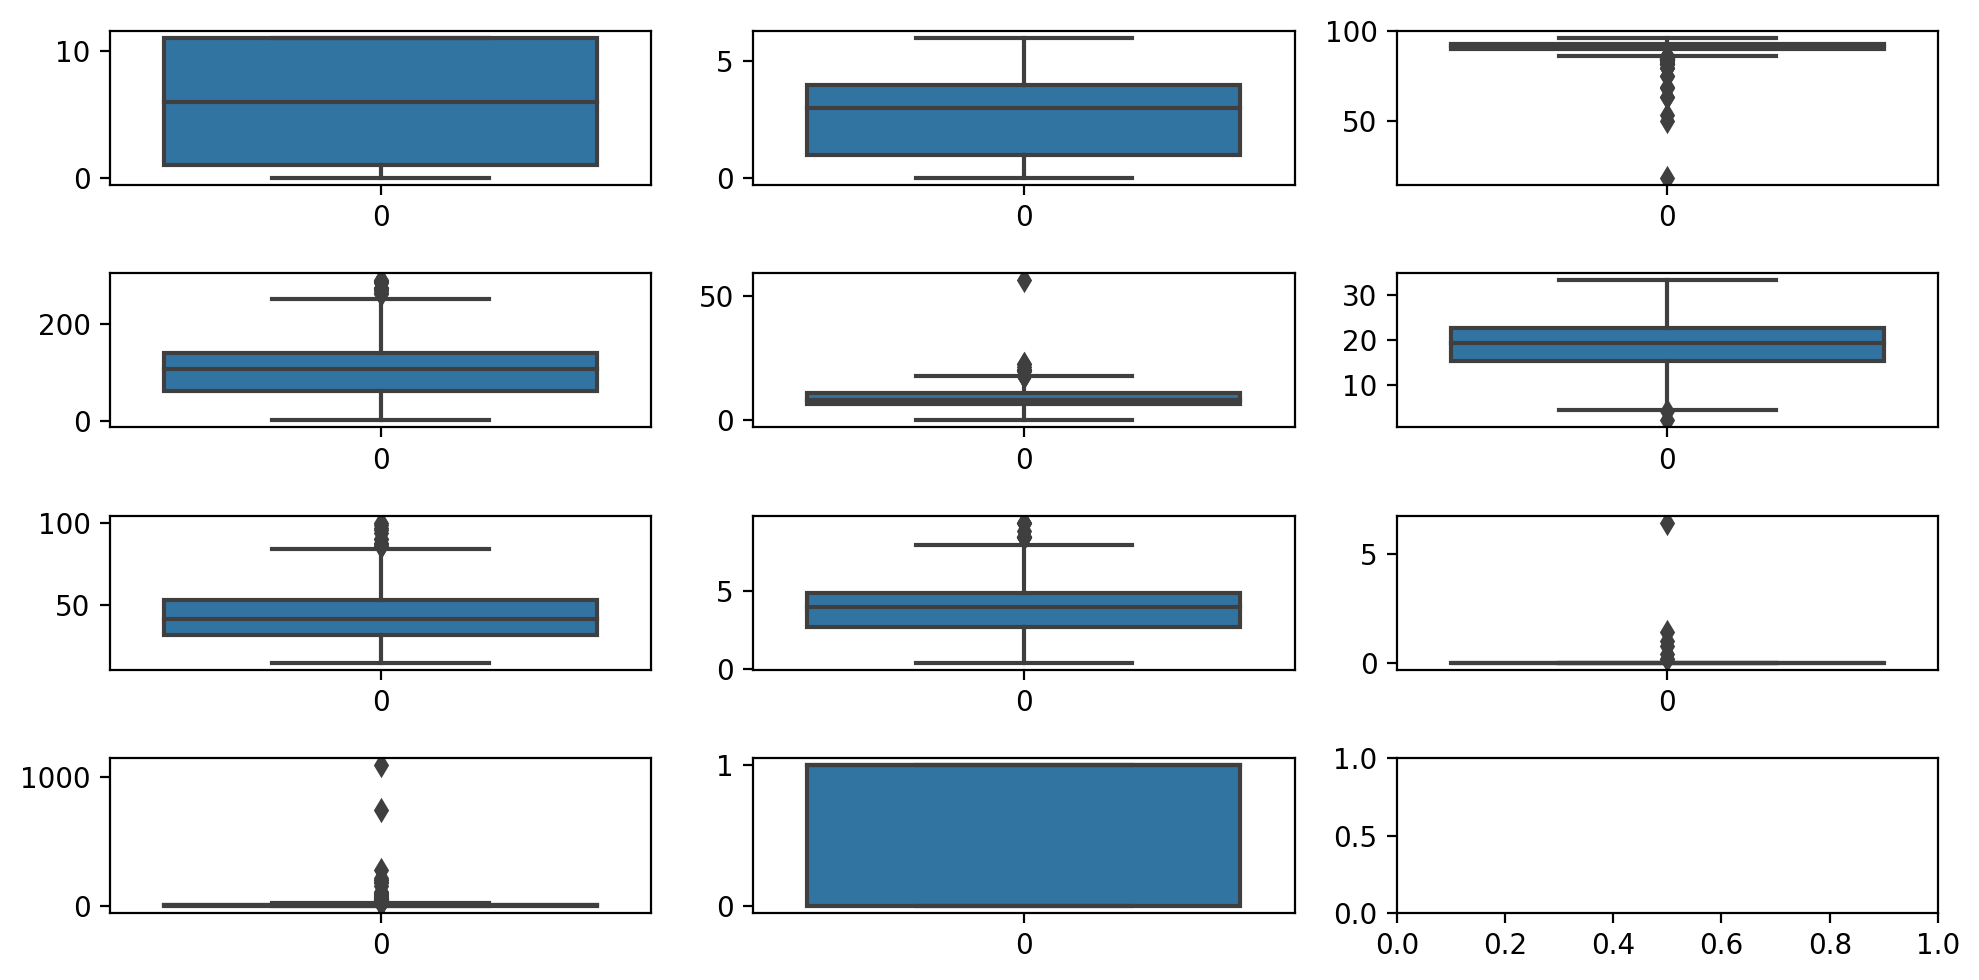

In [15]:
fig,ax=plt.subplots(4, 3)

sns.boxplot(df.month,ax=ax[0,0])
sns.boxplot(df.day,ax=ax[0,1])
sns.boxplot(df.FFMC,ax=ax[0,2])
sns.boxplot(df.DMC,ax=ax[1,0])
sns.boxplot(df.ISI,ax=ax[1,1])
sns.boxplot(df.temp,ax=ax[1,2])
sns.boxplot(df.RH,ax=ax[2,0])
sns.boxplot(df.wind,ax=ax[2,1])
sns.boxplot(df.rain,ax=ax[2,2])
sns.boxplot(df.area,ax=ax[3,0])
sns.boxplot(df.size_category,ax=ax[3,1])

plt.tight_layout()

In [16]:
#Setting the Target and Independnt Columns

In [17]:
x= df.iloc[:,:11]
y= df.iloc[:,-1]

In [18]:
#Constructing a Sequential neural network with
#1. Input neurons:11neurons  
#2. Hidden layer :8 neurons 
#3. Output layer:1neuron

In [19]:
model = Sequential()
model.add(Dense(11,kernel_initializer='random_normal',activation='relu'))
model.add(Dense(8,kernel_initializer='random_normal',activation='linear'))
model.add(Dense(1,kernel_initializer='random_normal',activation='sigmoid'))

In [20]:
# Compiling Model with 
# loss function: binary crossentropy
# optimizer:Adam

In [21]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [22]:
# Model Fitting 

In [30]:
model.fit(x,y,validation_split=0.33, epochs=150, batch_size=10)

Epoch 1/150
35/35 [==============================] - 0s 10ms/step - loss: 6.7082e-04 - accuracy: 1.0000 - val_loss: 0.1412 - val_accuracy: 0.9583
Epoch 2/150
35/35 [==============================] - 0s 10ms/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 0.1470 - val_accuracy: 0.9583
Epoch 3/150
35/35 [==============================] - 0s 11ms/step - loss: 6.3909e-04 - accuracy: 1.0000 - val_loss: 0.1427 - val_accuracy: 0.9643
Epoch 4/150
35/35 [==============================] - 0s 9ms/step - loss: 9.1610e-04 - accuracy: 1.0000 - val_loss: 0.1447 - val_accuracy: 0.9524
Epoch 5/150
35/35 [==============================] - 0s 7ms/step - loss: 6.3930e-04 - accuracy: 1.0000 - val_loss: 0.1461 - val_accuracy: 0.9643
Epoch 6/150
35/35 [==============================] - 0s 10ms/step - loss: 6.1917e-04 - accuracy: 1.0000 - val_loss: 0.1434 - val_accuracy: 0.9643
Epoch 7/150
35/35 [==============================] - 0s 7ms/step - loss: 6.4825e-04 - accuracy: 1.0000 - val_loss: 0.1429 - val_ac

35/35 [==============================] - 0s 9ms/step - loss: 6.1517e-04 - accuracy: 1.0000 - val_loss: 0.1430 - val_accuracy: 0.9702
Epoch 58/150
35/35 [==============================] - 0s 9ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.1633 - val_accuracy: 0.9583
Epoch 59/150
35/35 [==============================] - 0s 12ms/step - loss: 7.6175e-04 - accuracy: 1.0000 - val_loss: 0.1427 - val_accuracy: 0.9702
Epoch 60/150
35/35 [==============================] - 0s 13ms/step - loss: 5.5038e-04 - accuracy: 1.0000 - val_loss: 0.1467 - val_accuracy: 0.9702
Epoch 61/150
35/35 [==============================] - 0s 9ms/step - loss: 5.8069e-04 - accuracy: 1.0000 - val_loss: 0.1462 - val_accuracy: 0.9702
Epoch 62/150
35/35 [==============================] - 0s 6ms/step - loss: 5.6807e-04 - accuracy: 1.0000 - val_loss: 0.1462 - val_accuracy: 0.9702
Epoch 63/150
35/35 [==============================] - 0s 8ms/step - loss: 6.5435e-04 - accuracy: 1.0000 - val_loss: 0.1466 - val_accuracy: 

35/35 [==============================] - 0s 7ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.1641 - val_accuracy: 0.9524
Epoch 114/150
35/35 [==============================] - 0s 6ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.1716 - val_accuracy: 0.9524
Epoch 115/150
35/35 [==============================] - 0s 9ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.1787 - val_accuracy: 0.9524
Epoch 116/150
35/35 [==============================] - 0s 7ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.1638 - val_accuracy: 0.9524
Epoch 117/150
35/35 [==============================] - 0s 8ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.1636 - val_accuracy: 0.9583
Epoch 118/150
35/35 [==============================] - 0s 8ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.1736 - val_accuracy: 0.9524
Epoch 119/150
35/35 [==============================] - 0s 6ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.1709 - val_accuracy: 0.9524
Epoch 120/150

In [24]:
# Evaluation of Model

In [25]:
score = model.evaluate(x,y)
print("%s: %.2f%%" % (model.metrics_names[1], score[1]*100))

16/16 [==============================] - 0s 3ms/step - loss: 0.0473 - accuracy: 0.9882
accuracy: 98.82%


In [26]:
history = model.fit(x, y, validation_split=0.33, epochs=150, batch_size=10)

Epoch 1/150
35/35 [==============================] - 0s 10ms/step - loss: 0.0314 - accuracy: 0.9853 - val_loss: 0.1404 - val_accuracy: 0.9643
Epoch 2/150
35/35 [==============================] - 0s 7ms/step - loss: 0.0532 - accuracy: 0.9795 - val_loss: 0.1764 - val_accuracy: 0.9464
Epoch 3/150
35/35 [==============================] - 0s 11ms/step - loss: 0.0192 - accuracy: 0.9912 - val_loss: 0.1131 - val_accuracy: 0.9702
Epoch 4/150
35/35 [==============================] - 0s 6ms/step - loss: 0.0175 - accuracy: 0.9912 - val_loss: 0.1415 - val_accuracy: 0.9643
Epoch 5/150
35/35 [==============================] - 0s 12ms/step - loss: 0.0258 - accuracy: 0.9883 - val_loss: 0.1795 - val_accuracy: 0.9345
Epoch 6/150
35/35 [==============================] - 0s 11ms/step - loss: 0.0050 - accuracy: 1.0000 - val_loss: 0.1084 - val_accuracy: 0.9762
Epoch 7/150
35/35 [==============================] - 0s 12ms/step - loss: 0.0041 - accuracy: 1.0000 - val_loss: 0.1153 - val_accuracy: 0.9702
Epoch 8/

35/35 [==============================] - 0s 9ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.1395 - val_accuracy: 0.9643
Epoch 116/150
35/35 [==============================] - 0s 6ms/step - loss: 6.2893e-04 - accuracy: 1.0000 - val_loss: 0.1356 - val_accuracy: 0.9583
Epoch 117/150
35/35 [==============================] - 0s 7ms/step - loss: 5.3443e-04 - accuracy: 1.0000 - val_loss: 0.1373 - val_accuracy: 0.9702
Epoch 118/150
35/35 [==============================] - 0s 10ms/step - loss: 5.6222e-04 - accuracy: 1.0000 - val_loss: 0.1374 - val_accuracy: 0.9702
Epoch 119/150
35/35 [==============================] - 0s 7ms/step - loss: 5.7269e-04 - accuracy: 1.0000 - val_loss: 0.1414 - val_accuracy: 0.9583
Epoch 120/150
35/35 [==============================] - 0s 7ms/step - loss: 5.7696e-04 - accuracy: 1.0000 - val_loss: 0.1383 - val_accuracy: 0.9583
Epoch 121/150
35/35 [==============================] - 0s 7ms/step - loss: 5.2965e-04 - accuracy: 1.0000 - val_loss: 0.1407 - val_accur

In [27]:
model.history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

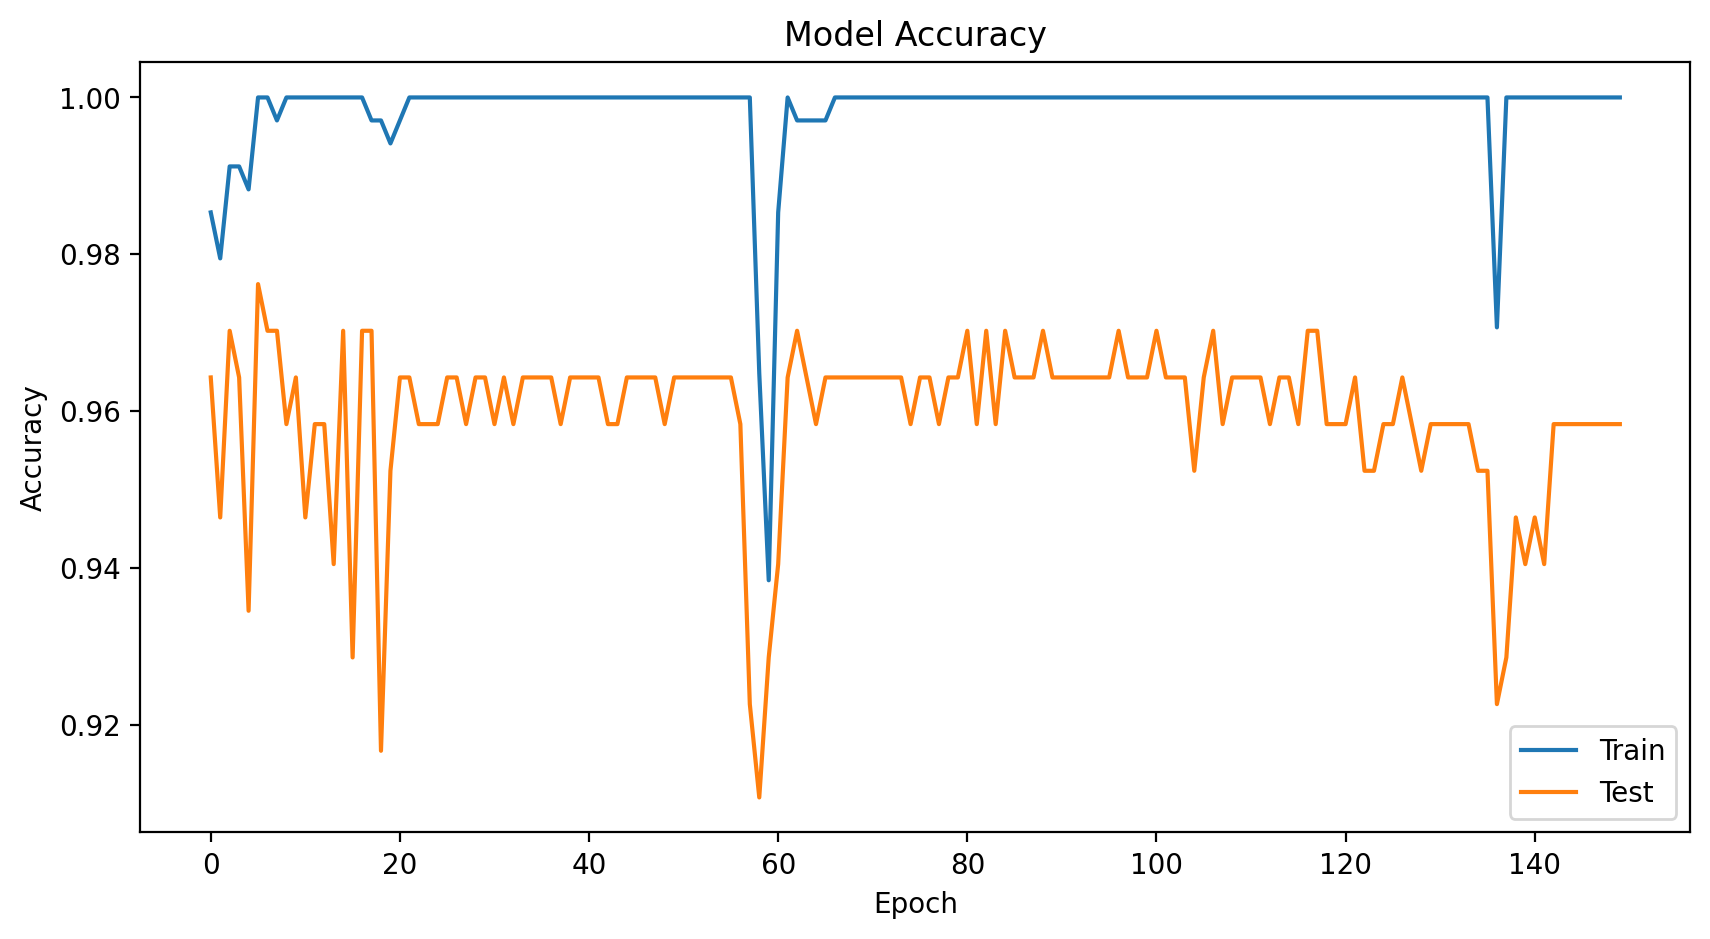

In [28]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()

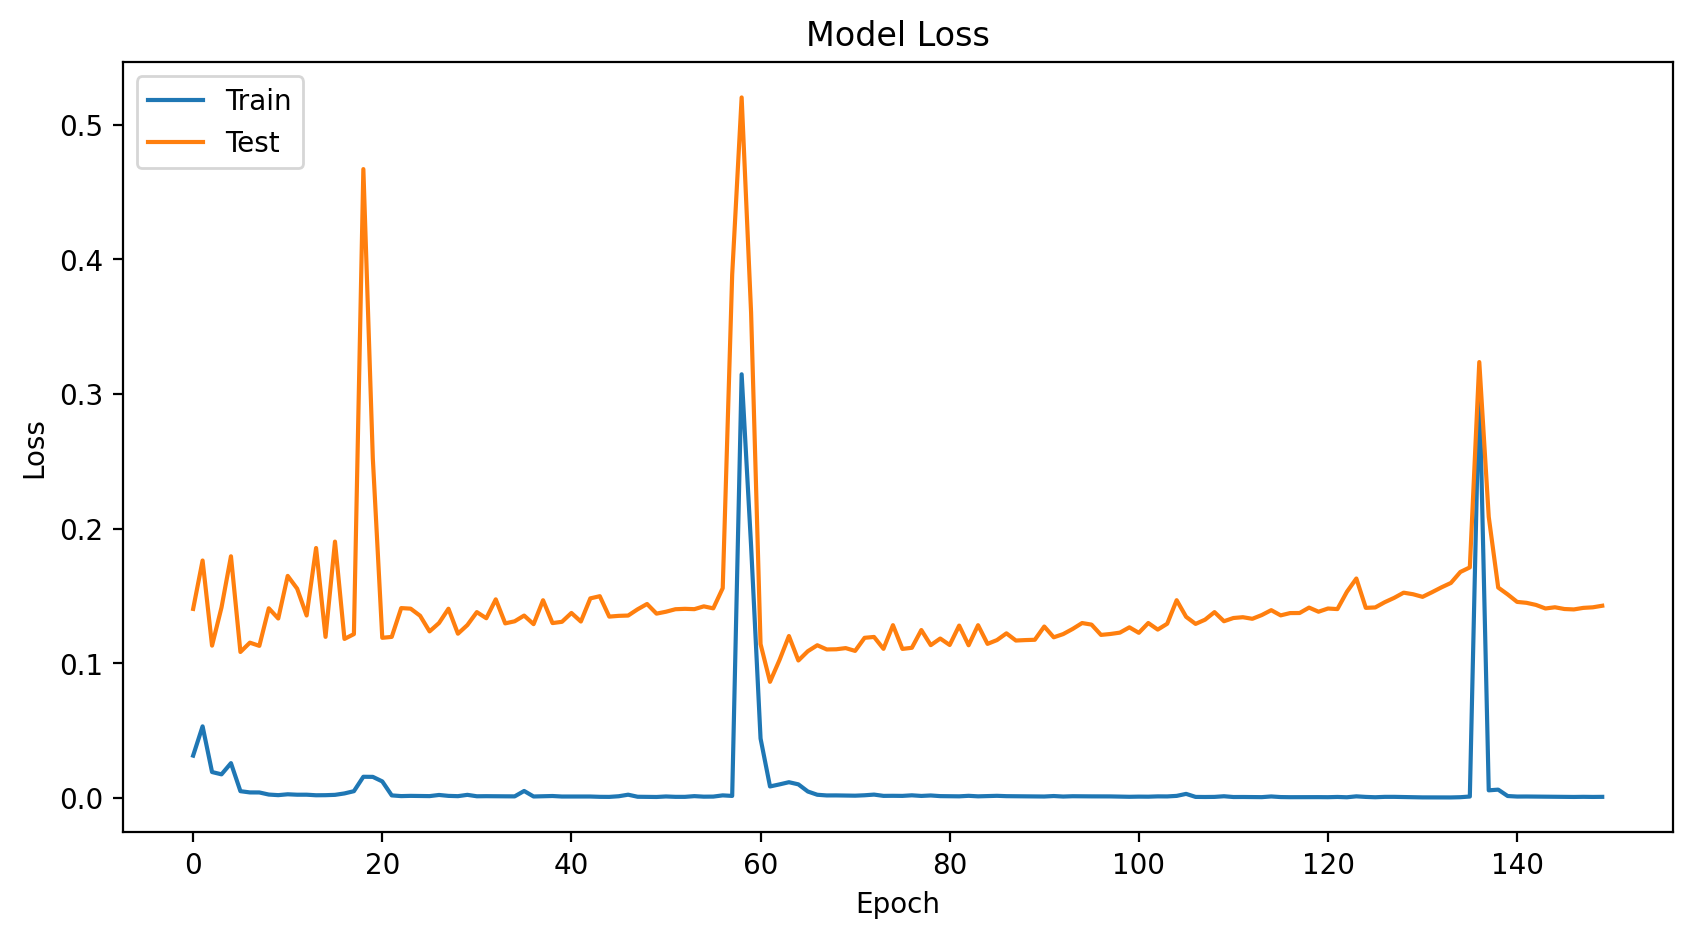

In [29]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

## Inference:

## For classifying the burnt areas in forest by using neural network giving highest evaluation accuracy 98.82% and with a minimal loss of 0.0412% 